# Feature Engineering

### ❓ What is it?
Feature engineering is the process of transforming raw data into useful features that help machine learning models perform better.

### 💡 Why do we do it?
-  Improve accuracy  
-  Reduce overfitting  
-  Boost interpretability  
-  Increase efficiency  

### 📍 Where is it used?
-  Encoding categorical variables (e.g., one-hot encoding)  
-  Scaling, transforming, binning, deriving new features  
-  In sklearn pipelines (preprocessing + modeling)


## Common Techniques in Feature Engineering

In [11]:
!pip install nltk

In [12]:
# ===============================
# Feature Engineering Examples
# ===============================

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download stopwords if not already
nltk.download('stopwords')

# -------------------------------
# 1. One-Hot Encoding
# -------------------------------
data = {'Color': ['Red', 'Blue', 'Green', 'Blue']}
df = pd.DataFrame(data)

df_encoded = pd.get_dummies(df, columns=['Color'], prefix='Color')
print("=== One-Hot Encoding ===")
print(df_encoded, "\n")

# -------------------------------
# 2. Binning
# -------------------------------
data = {'Age': [23, 45, 18, 34, 67, 50, 21]}
df = pd.DataFrame(data)

bins = [0, 20, 40, 60, 100]
labels = ['0-20', '21-40', '41-60', '61+']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
print("=== Binning ===")
print(df, "\n")

# -------------------------------
# 3. Text Data Processing
# -------------------------------
texts = ["This is a sample sentence.", "Text data preprocessing is important."]

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
vectorizer = CountVectorizer()

def preprocess_text(text):
    words = text.split()
    words = [stemmer.stem(word)
             for word in words if word.lower() not in stop_words]
    return " ".join(words)

cleaned_texts = [preprocess_text(text) for text in texts]
X = vectorizer.fit_transform(cleaned_texts)

print("=== Text Preprocessing ===")
print("Cleaned Texts:", cleaned_texts)
print("Vectorized Text:\n", X.toarray(), "\n")


# 4. Extracting Features from Address
data = {'Full_Address': [
    '123 Elm St, Springfield, 12345',
    '456 Oak Rd, Shelbyville, 67890'
]}
df = pd.DataFrame(data)

df[['Street', 'City', 'Zipcode']] = df['Full_Address'].str.extract(
    r'([0-9]+\s[\w\s]+),\s([\w\s]+),\s(\d+)'
)

print("=== Address Feature Extraction ===")
print(df)


=== One-Hot Encoding ===
   Color_Blue  Color_Green  Color_Red
0       False        False       True
1        True        False      False
2       False         True      False
3        True        False      False 

=== Binning ===
   Age Age_Group
0   23     21-40
1   45     41-60
2   18      0-20
3   34     21-40
4   67       61+
5   50     41-60
6   21     21-40 

=== Text Preprocessing ===
Cleaned Texts: ['sampl sentence.', 'text data preprocess important.']
Vectorized Text:
 [[0 0 0 1 1 0]
 [1 1 1 0 0 1]] 

=== Address Feature Extraction ===
                     Full_Address      Street         City Zipcode
0  123 Elm St, Springfield, 12345  123 Elm St  Springfield   12345
1  456 Oak Rd, Shelbyville, 67890  456 Oak Rd  Shelbyville   67890


[nltk_data] Downloading package stopwords to C:\Users\Sambridhi
[nltk_data]     Shrestha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Polynomial Features

### ❓ What is it?
Polynomial features expand original inputs by adding new features that are powers (e.g., squared, cubic) and interaction terms, enabling models to capture nonlinear relationships.

### 💡 Why use them?
- Capture complex, nonlinear patterns with linear models.  
- Introduce interaction effects between features.  
- Enhance model performance when data relationships are not linear.  

### 📍 Where to apply?
- In **regression tasks** where linear models underfit the data.  
- Within preprocessing **pipelines** (e.g., scikit-learn `PolynomialFeatures` + model), ensuring consistent transformations.  


Original X:
[1 2 3 4 5]
Predictions (degree=2):
[ 2.  5. 10. 17. 26.]


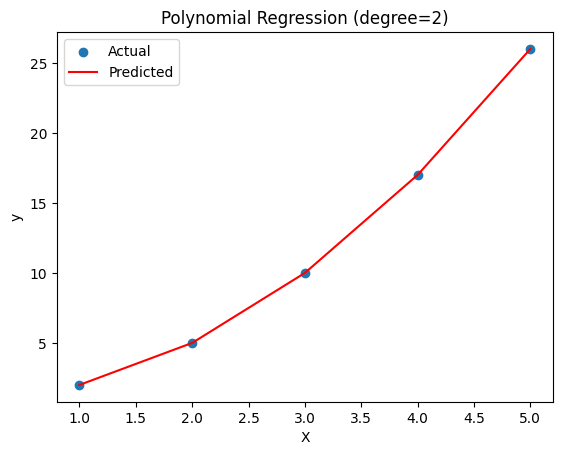

In [13]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Sample data (simple quadratic pattern)
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([2, 5, 10, 17, 26])  # roughly y = x^2 + 1

# Create a pipeline: polynomial features + linear regression
degree = 2
model = make_pipeline(PolynomialFeatures(degree, include_bias=False),
                      LinearRegression())

# Train the model
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Display results
print(f"Original X:\n{X.flatten()}")
print(f"Predictions (degree={degree}):\n{y_pred}")

# Optional: visualize fit
plt.scatter(X, y, label="Actual")
plt.plot(X, y_pred, color='red', label="Predicted")
plt.title(f"Polynomial Regression (degree={degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Interaction terms 

### 🌟 What is it?
- **Feature interactions** occur when the effect of one feature on the target depends on the value of another — like how BMI depends on both weight and height².  
- **Polynomial features** ⚡ capture these interactions by generating feature combinations, such as products  and powers, making them a natural way to model interactions.

### 🤔 Why use interaction terms?
- Including interaction terms helps uncover non-additive relationships that a model would otherwise miss.  
- They make models more expressive 🎨 and capable of reflecting real-world dependencies between features.

### 🛠️ Where to apply?
- During feature engineering 🧑‍💻, especially when using **PolynomialFeatures** in preprocessing pipelines.  
- Particularly useful in **regression** 📈 or **classification** 🤖 setups where underlying relationships between variables are not purely linear.

Original Features:
 [[1 2]
 [2 3]
 [3 4]
 [4 5]
 [5 6]]

Polynomial + Interaction Features:
 [[ 1.  2.  1.  2.  4.]
 [ 2.  3.  4.  6.  9.]
 [ 3.  4.  9. 12. 16.]
 [ 4.  5. 16. 20. 25.]
 [ 5.  6. 25. 30. 36.]]

Predictions: [ 5. 11. 19. 29. 41.]


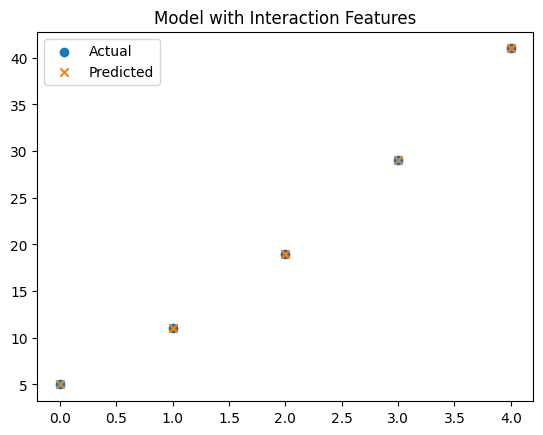

In [15]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Sample dataset with two features
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([5, 11, 19, 29, 41])  # roughly y = 1*x1 + 2*x2 + x1*x2

# Create polynomial features up to degree 2 (includes interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Original Features:\n", X)
print("\nPolynomial + Interaction Features:\n", X_poly)

# Fit a simple linear regression model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

print("\nPredictions:", y_pred)

# Optional: visualize prediction vs actual (for one feature subset)
plt.scatter(range(len(y)), y, label="Actual")
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("Model with Interaction Features")
plt.show()

##  Regularization

### 📌 What?  
Regularization is a technique to reduce **overfitting** by adding a penalty term to the model’s loss function, discouraging large coefficient values.  

### 🤔 Why?  
- ⚖️ Reduces model complexity and variance.  
- 📈 Improves generalization to unseen data.  
- 🔄 Enforces a bias–variance tradeoff to achieve better predictive performance.  

### 🌍 Where?  
- 📊 Used in regression models (linear, logistic, etc.) when overfitting is a concern.  
- 🔧 Incorporated into preprocessing pipelines or model definitions (e.g., `sklearn`'s regularized regressors).  

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 3 * X.flatten() + np.random.randn(100) * 5   # linear + noise

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Without Regularization (Normal Linear Regression)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))

Linear Regression MSE: 16.342487842925063


##  Lasso (L1 Regularization)  

### 📌 What?  
Adds a penalty equal to the **sum of absolute coefficients**, encouraging sparsity and enabling **feature selection**.  

### 🤔 Why?  
- ✂️ Reduces irrelevant or redundant features.  
- 📉 Yields simpler, more interpretable models.  

### 🌍 Where?  
- 📊 High-dimensional data or when automatic feature selection is desired.  
- 🧾 Useful when interpretability is important or when pruning features improves efficiency.  


In [18]:
# =========================
# Lasso Regression (L1)
# =========================
lasso_model = Lasso(alpha=0.1)  # alpha = strength of penalty
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso Regression MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Coefficients:", lasso_model.coef_)


Lasso Regression MSE: 16.314236608292816
Lasso Coefficients: [2.78753357]


## Ridge (L2 Regularization)

### 📌 What?  
Adds a penalty equal to the sum of squared coefficients, encouraging smaller but non-zero weights.  

### 🤔 Why?  
- 🔗 Handles multicollinearity by distributing weights evenly.  
- 🛡️ Stabilizes model estimates without eliminating features.  

### 🌍 Where?  
- 📊 Regression tasks with correlated input features.  
- ⚡ When model stability and performance are prioritized over interpretability.  

In [20]:
# =========================
# Ridge Regression (L2)
# =========================
ridge_model = Ridge(alpha=1.0)  # alpha = strength of penalty
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Coefficients:", ridge_model.coef_)

Ridge Regression MSE: 16.33230456004441
Ridge Coefficients: [2.79520419]


##  Effect on Weights in Regularization

### 📌 What?
Regularization modifies the **loss function** by adding a penalty on model weights (coefficients) to prevent overfitting:

- **L1 Regularization (Lasso)** adds the **sum of absolute values** of coefficients.  
  - Some weights shrink exactly to **0**, performing feature selection.  
- **L2 Regularization (Ridge)** adds the **sum of squared coefficients**.  
  - Weights shrink towards **0** but rarely become exactly zero, stabilizing the model.


### 🤔 Why?
- Reduces model complexity and prevents overfitting.  
- Controls large weights that can dominate predictions.  
- Makes models **more interpretable (Lasso)** or **more stable (Ridge)**.  
- Helps in handling **multicollinearity** (especially Ridge).


### 🌍 Where?
- During **feature engineering** for regression or classification models.  
- In **high-dimensional datasets** where some features may be irrelevant.  
- Within **machine learning pipelines** using `scikit-learn`’s `Lasso` or `Ridge`.

Original Weights: [60.57748194 98.65152488 64.59172413 57.07783047 35.60967259]
Lasso Weights: [61.35643898 98.33811173 60.47349988 54.44439604 35.19693377]
Ridge Weights: [61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]


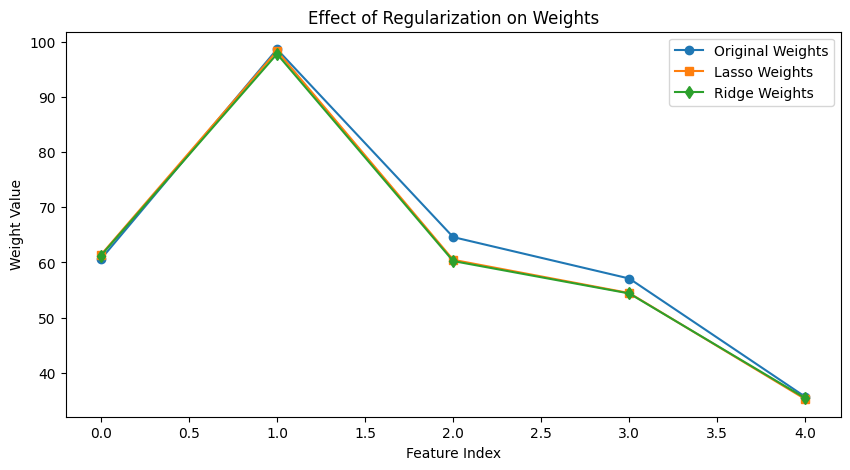

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.datasets import make_regression

# Generate synthetic data with 5 features
X, y, coef = make_regression(n_samples=100, n_features=5, noise=10, coef=True, random_state=42)

# Train Lasso and Ridge
lasso = Lasso(alpha=0.5).fit(X, y)
ridge = Ridge(alpha=1.0).fit(X, y)

# Display weights
print("Original Weights:", coef)
print("Lasso Weights:", lasso.coef_)
print("Ridge Weights:", ridge.coef_)

# Visualize
plt.figure(figsize=(10,5))
plt.plot(coef, 'o-', label='Original Weights')
plt.plot(lasso.coef_, 's-', label='Lasso Weights')
plt.plot(ridge.coef_, 'd-', label='Ridge Weights')
plt.xlabel('Feature Index')
plt.ylabel('Weight Value')
plt.title('Effect of Regularization on Weights')
plt.legend()
plt.show()

## Bagging 

### 📌 What is Bagging?
- Bagging is an **ensemble learning method** used to reduce variance in noisy datasets.  
- It works by **randomly sampling the training data with replacement** (bootstrapping) and training multiple weak learners independently.  
- Predictions are aggregated:  
  - **Regression:** average of predictions (soft voting)  
  - **Classification:** majority vote (hard voting)  
- **Random Forest** is an extension of bagging with added feature randomness.


### 🤔 Why Use Bagging?
- Reduces **variance** and prevents overfitting.  
- Improves **model generalization** to unseen data.  
- Combines multiple weak learners into a **strong learner** for better performance.  
- Effective with algorithms that are **unstable** (like Decision Trees).


### 🌍 Where to Apply Bagging?
- In **high-variance models**, such as unpruned decision trees.  
- When building ensemble models to improve accuracy.  
- Useful in regression and classification tasks.  
- Widely applied in finance, healthcare, IT, and environmental applications for prediction and risk reduction.


## Bagging for Classification

In [26]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Classifier
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)
bag_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = bag_clf.predict(X_test)
print("Bagging Classification Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classification Accuracy: 1.0


## Bagging for Regression

In [28]:
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bagging Regressor
bag_reg = BaggingRegressor(
    estimator=DecisionTreeClassifier(),  # Use DecisionTreeRegressor instead
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)
from sklearn.tree import DecisionTreeRegressor
bag_reg = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    max_samples=0.8,
    random_state=42
)
bag_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = bag_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Bagging Regression MSE:", mse)


Bagging Regression MSE: 148.9385026301083


## Ensemble Methods

## AdaBoost (Adaptive Boosting)

### 📌 What is AdaBoost?
- Ensemble learning technique that combines **weak classifiers** to form a **strong classifier**.  
- Trains classifiers **sequentially**, focusing on **errors of previous models**.  
- Misclassified samples get **higher weights** to improve learning.

### 🤔 Why Use AdaBoost?
- **Improves Accuracy**: Combines weak learners for better predictions.  
- **Reduces Bias & Variance**: Enhances generalization.  
- **Handles Complex Data**: Works well where single models underperform.

### 🌍 Where to Apply AdaBoost?
- **Binary Classification** problems.  
- **Imbalanced datasets**.  
- **Noisy data**, though sensitive to outliers.


In [33]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

class AdaBoost:
    def __init__(self, n_estimators=50):
        self.n_estimators = n_estimators
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples  # Initialize weights

        for _ in range(self.n_estimators):
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X, y, sample_weight=w)
            y_pred = model.predict(X)

            # Calculate error rate
            err = np.sum(w * (y_pred != y)) / np.sum(w)
            if err == 0:
                break

            # Calculate alpha
            alpha = 0.5 * np.log((1 - err) / err)
            self.alphas.append(alpha)
            self.models.append(model)

            # Update sample weights
            w *= np.exp(-alpha * y * y_pred)
            w /= np.sum(w)

    def predict(self, X):
        pred = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            pred += alpha * model.predict(X)
        return np.sign(pred)

# Example usage
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
y = 2 * y - 1  # Convert labels to {-1, 1}

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train AdaBoost
ab = AdaBoost(n_estimators=50)
ab.fit(X_train, y_train)

# Make predictions
y_pred = ab.predict(X_test)

# Evaluate accuracy
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.8467


In [34]:
# Import libraries
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Generating synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost Regressor with Decision Stump as base estimator
ab_reg = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=1),  # updated parameter
    n_estimators=50,
    learning_rate=0.5,
    random_state=42
)

# Train the model
ab_reg.fit(X_train, y_train)

# Predict on test data
y_pred = ab_reg.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print("AdaBoost Regression MSE:", mse)

AdaBoost Regression MSE: 4430.620947369858


##  Gradient Boosting

### 📌 What is Gradient Boosting?
- Ensemble technique that builds **weak learners sequentially**, each correcting the errors of the previous ones.  
- Optimizes a **loss function** using **gradient descent**.  
- Commonly uses **decision trees** as weak learners.

### 🤔 Why Use Gradient Boosting?
- **High Accuracy**: Sequential learning reduces errors step by step.  
- **Handles Complex Patterns**: Captures non-linear relationships effectively.  
- **Flexible**: Works with different loss functions (e.g., MSE, Log Loss).

### 🌍 Where to Apply Gradient Boosting?
- **Regression** and **classification** tasks.  
- Datasets with **complex relationships**.  
- Applications like **risk prediction, fraud detection, and recommendation systems**

## Gradient Boosting for Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

SEED = 23

X, y = load_digits(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)
acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.98


## Gradient Boosting for Regression

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

SEED = 23

X, y = load_diabetes(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbr = GradientBoostingRegressor(loss='absolute_error',
                                learning_rate=0.1,
                                n_estimators=300,
                                max_depth = 1, 
                                random_state = SEED,
                                max_features = 5)

gbr.fit(train_X, train_y)

pred_y = gbr.predict(test_X)

test_rmse = mean_squared_error(test_y, pred_y) ** (1 / 2)

print('Root mean Square error: {:.2f}'.format(test_rmse))

Root mean Square error: 56.39


##  XGBoost (Extreme Gradient Boosting)

### 📌 What is XGBoost?
- An **optimized version of Gradient Boosting** with better speed and performance.  
- Incorporates **regularization** to reduce overfitting.  
- Supports **parallel processing** and handles missing data efficiently.

### 🤔 Why Use XGBoost?
- **Fast and Scalable**: Efficient on large datasets.  
- **Regularization**: Reduces overfitting and improves generalization.  
- **Highly Accurate**: Often outperforms other ensemble methods.

### 🌍 Where to Apply XGBoost?
- Large-scale **regression** and **classification** tasks.  
- **Finance, healthcare, and e-commerce** for prediction and ranking problems.  
- Competitions and real-world problems where **high performance is required**.

## XGBoost Regression

In [49]:
# For most Python environments
!!pip install xgboost

['Requirement already satisfied: xgboost in c:\\users\\sambridhi shrestha\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (3.0.4)',
 'Requirement already satisfied: numpy in c:\\users\\sambridhi shrestha\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from xgboost) (2.2.4)',
 'Requirement already satisfied: scipy in c:\\users\\sambridhi shrestha\\appdata\\local\\programs\\python\\python312\\lib\\site-packages (from xgboost) (1.15.2)']

In [50]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=500, n_features=5, noise=10, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1055.7840650944024


## XGBoost Classification

In [51]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Classifier
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, n_estimators=100, learning_rate=0.1)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


## Compare Ridge vs Lasso on same dataset

## 📌What is Done in the code

- **Load Dataset**: 
  - Loaded the Iris dataset using `load_iris()` from `sklearn.datasets`.

- **Select Target and Features**: 
  - Chose petal length as the target variable (`y`).  
  - Remaining features are used as predictors (`X`).

- **Split Data**: 
  - Split the dataset into **training** and **testing** sets (80% train, 20% test) using `train_test_split`.

- **Initialize Models**: 
  - **Ridge Regression** (Ridge) with L2 regularization.  
  - **Lasso Regression** (Lasso) with L1 regularization.

- **Train Models**: 
  - Fit both Ridge and Lasso on the **training data**.

- **Make Predictions**: 
  - Predict petal length for the **test set** using both models.

- **Evaluate Performance**: 
  - Calculate **Mean Squared Error (MSE)** for Ridge and Lasso predictions.

- **Inspect Coefficients** (Optional): 
  - See how Ridge shrinks coefficients vs Lasso, which may set some to zero.

In [47]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = X['petal length (cm)']  # Use petal length as target
X = X.drop(columns=['petal length (cm)'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.1)

# Train models
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate models
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))

# Optional: check coefficients
print("Ridge Coefficients:", ridge_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)

Ridge MSE: 0.1287461738107129
Lasso MSE: 0.17275238696285136
Ridge Coefficients: [ 0.73831951 -0.62706315  1.43454589]
Lasso Coefficients: [ 0.51844043 -0.10251673  1.58636102]


## Train a Random Forest and check feature importance

## 📌 Random Forest on Iris Dataset: What is Done

- **Load Dataset**:  
  - Loaded the Iris dataset using `load_iris()` from `sklearn.datasets`.

- **Select Target and Features**:  
  - Chose **petal length** as the target variable (`y`).  
  - Remaining features are used as predictors (`X`).

- **Split Data**:  
  - Split the dataset into **training** and **testing** sets (80% train, 20% test) using `train_test_split`.

- **Initialize Model**:  
  - Created a **Random Forest Regressor** with 100 trees (`n_estimators=100`).

- **Train Model**:  
  - Fit the Random Forest model on the **training data**.

- **Check Feature Importance**:  
  - Used feature_importances_ to see **how much each feature contributes** to predicting the target.  
  - Displayed the results in a **sorted DataFrame** for clarity.

In [54]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = X['petal length (cm)']  # Use petal length as target
X = X.drop(columns=['petal length (cm)'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Check feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

             Feature  Importance
2   petal width (cm)    0.953738
0  sepal length (cm)    0.039046
1   sepal width (cm)    0.007215


# 📌 Regularization in Machine Learning

### What is Regularization?  
- Technique to reduce overfitting by adding a penalty term to the loss function.  
- Encourages smaller coefficients to improve generalization.

### Types of Regularization Penalty Terms  
1. **L1 Regularization (Lasso)**  
   - Penalty = sum of absolute values of coefficients.  
   - Can shrink some coefficients to zero, performing feature selection.

2. **L2 Regularization (Ridge)**  
   - Penalty = sum of squared values of coefficients.  
   - Shrinks coefficients but keeps all features, stabilizing the model.

3. **Elastic Net**  
   - Combination of L1 and L2 penalties.  
   - Balances feature selection and coefficient shrinkage.

### Why Use Regularization?  
- Reduces **overfitting** and improves **generalization**.  
- Controls **model complexity** and prevents very large weights.  
- Helps handle **multicollinearity** in regression.

### Where to Apply Regularization?  
- In **regression models** (Linear, Logistic, etc.) when overfitting occurs.  
- In **pipelines** during preprocessing or model definition.  
- High-dimensional data where some features may be irrelevant.
